In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [108]:
import pylab
from matplotlib import cm

In [9]:
df = pd.read_csv('fulldata(+18dis).csv')
df.head()

,District,SA (ft2),Price(HK$),Date,Floor,Price/ft2(SA),Estate,District1
0,Tsuen Wan Town Centre,391,12500,2022-04-30 00:00:00,L,31.97,Victory Court,KWAI TSING
1,Sai Wan Ho,210,10800,2022-04-30 00:00:00,H,51.43,Parker33,EASTERN
2,Olympic Station,548,21500,2022-04-30 00:00:00,H,39.23,The Long Beach,YAU TSIM MONG
3,Lohas Park,807,26800,2022-04-30 00:00:00,M,33.21,Lohas Park,SAI KUNG
4,Lohas Park,775,21000,2022-04-30 00:00:00,H,27.10,Lohas Park,SAI KUNG


In [10]:
df['Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   District       9911 non-null   object        
 1   SA (ft2)       9911 non-null   int64         
 2   Price(HK$)     9911 non-null   int64         
 3   Date           9911 non-null   datetime64[ns]
 4   Floor          9911 non-null   object        
 5   Price/ft2(SA)  9911 non-null   float64       
 6   Estate         9911 non-null   object        
 7   District1      9911 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 619.6+ KB


In [17]:
df1 = df[(df['Date'] >= '2022-04-01') & (df['Date']<='2022-04-30')]

df1.groupby('District1').Estate.count()


District1
CENTRAL & WESTERN    165
EASTERN              141
ISLANDS              109
KOWLOON CITY          62
KWAI TSING            57
KWUN TONG             73
NORTH                 42
SAI KUNG             331
SHA TIN              133
SHAM SHUI PO          64
SOUTHERN              77
TAI PO                66
TSUEN WAN             98
TUEN MUN             121
WAN CHAI              84
WONG TAI SIN          12
YAU TSIM MONG        159
YUEN LONG            123
Name: Estate, dtype: int64

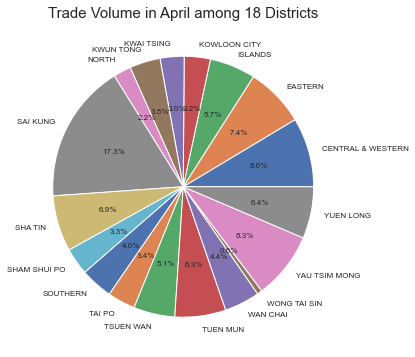

In [28]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Trade Volume in April among 18 Districts', fontsize=15)

ax = df1.groupby('District1').Estate.count().plot(kind='pie', figsize=(9,6),autopct='%1.1f%%', label="", textprops={'fontsize': 8}) 


In [29]:
fig = ax.get_figure()
fig.savefig("./myplot.pdf")

In [14]:
df2 = pd.get_dummies(df.set_index('District1')['Date'].dt.strftime("%m/%y")).reset_index().groupby('District1').sum()

df2

,01/22,02/22,03/22,04/22,10/21,11/21,12/21
District1,,,,,,,
CENTRAL & WESTERN,128.0,141.0,141.0,165.0,78.0,63.0,90.0
EASTERN,149.0,119.0,130.0,141.0,74.0,62.0,82.0
ISLANDS,96.0,85.0,78.0,109.0,55.0,52.0,56.0
KOWLOON CITY,65.0,64.0,69.0,62.0,43.0,40.0,67.0
KWAI TSING,52.0,50.0,46.0,57.0,24.0,18.0,34.0
KWUN TONG,103.0,73.0,92.0,73.0,66.0,60.0,53.0
NORTH,43.0,30.0,37.0,42.0,23.0,23.0,22.0
SAI KUNG,217.0,213.0,261.0,331.0,127.0,105.0,131.0
SHA TIN,140.0,101.0,109.0,133.0,65.0,63.0,89.0


In [13]:
df2_tr = df2.transpose()
df2_tr = df2_tr.loc[['10/21', '11/21', '12/21', '01/22', '02/22', '03/22', '04/22'], :]
print(df2_tr)

District1  CENTRAL & WESTERN  EASTERN  ISLANDS  KOWLOON CITY  KWAI TSING  \
10/21                   78.0     74.0     55.0          43.0        24.0   
11/21                   63.0     62.0     52.0          40.0        18.0   
12/21                   90.0     82.0     56.0          67.0        34.0   
01/22                  128.0    149.0     96.0          65.0        52.0   
02/22                  141.0    119.0     85.0          64.0        50.0   
03/22                  141.0    130.0     78.0          69.0        46.0   
04/22                  165.0    141.0    109.0          62.0        57.0   

District1  KWUN TONG  NORTH  SAI KUNG  SHA TIN  SHAM SHUI PO  SOUTHERN  \
10/21           66.0   23.0     127.0     65.0          39.0      46.0   
11/21           60.0   23.0     105.0     63.0          32.0      55.0   
12/21           53.0   22.0     131.0     89.0          46.0      49.0   
01/22          103.0   43.0     217.0    140.0          65.0      90.0   
02/22           73.0 

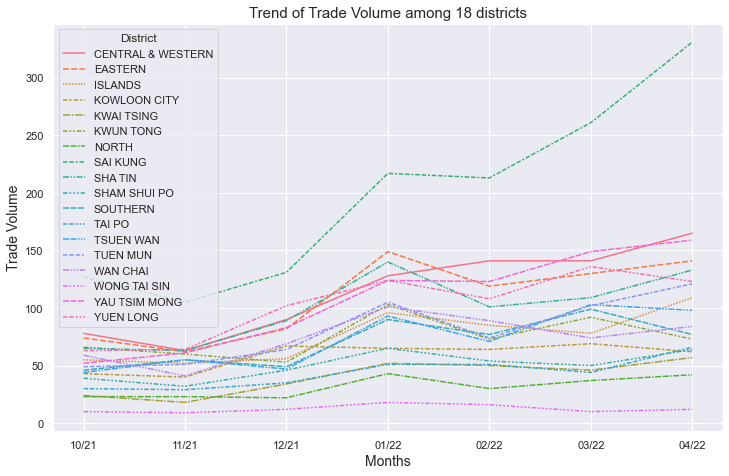

In [34]:
sns.set(rc={'figure.figsize':(12,7.5)})

x = sns.lineplot(data = df2_tr, err_style = None, sort=True)
plt.title('Trend of Trade Volume among 18 districts',size  = 15)
plt.xlabel('Months',size = 14)
plt.ylabel('Trade Volume',size = 14)
plt.legend(title="District")

In [35]:
fig = x.get_figure()
fig.savefig("./myplot2.pdf")